In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:
df = pd.read_csv('../../../data/dark_patterns.csv', delimiter=";")
df_ranks = pd.read_csv('../../../data/eshop_list.csv',
                       delimiter=",",
                       header=None,
                       names=['Name', 'HeurekaURL', 'URL', 'Domain']
                      )
df_ranks['rank'] = df_ranks.index+1
df['Domain'] = df['Domain'].str.replace('www.','')
df_ranks['Domain'] = df_ranks['Domain'].str.replace('www.','')

In [3]:
df = pd.merge(df,df_ranks,on='Domain',how='left')

In [4]:
df[df['rank'].isnull()]

,Pattern String,Comment,Pattern Category,Pattern Type,Where in website,Deceptive,Website Page,Domain,Name,HeurekaURL,URL,rank


## How many Dark Patterns were found

In [5]:
df.shape

(1430, 12)

## Eshops with the most occurences of Dark Patterns 

In [6]:
df.groupby('Domain')['Domain'].count().nlargest(20)

Domain
muziker.cz              9
coolboty.cz             8
jumboshop.cz            8
rescue-store.cz         8
cool-ceny.cz            7
ergobaby-eshop.cz       7
lopra.cz                7
buddytoys-eshop.cz      6
buxton-eshop.cz         6
pepovasleva.cz          6
ahifi.cz                5
eroticke-pomucky.com    5
eshop.alfafit.cz        5
fitanu.com              5
hospodynkam.cz          5
martinus.cz             5
memoa.cz                5
postovnezdarma.cz       5
probazen.com            5
skladovky.cz            5
Name: Domain, dtype: int64

In [7]:
#df[df['Domain']=="muziker.cz"]

## Sum of used dark pattern by category

In [8]:
df[['Pattern Category', 'Domain']].groupby('Pattern Category').agg({'Domain': ['count', pd.Series.nunique]})

Domain        
                  count nunique
Pattern Category               
Forced Action        75      62
Misdirection       1020     874
Obstruction           6       6
Scarcity             45      41
Sneaking              2       2
Social Proof        242     207
Urgency              40      37

## Sum of used dark pattern by type

In [9]:
df[['Pattern Type', 'Domain']].groupby('Pattern Type').agg({'Domain': ['count', pd.Series.nunique]})

Domain        
                                  count nunique
Pattern Type                                   
Activity Message                    223     193
Countdown Timer                      23      20
Forced Enrollment                    75      62
Hard to Cancel                        6       6
High-demand Message                   7       7
Limited-time Message                 17      17
Low-stock Message                    38      36
Pressured Selling                   924     843
Sneak into Basket                     2       2
Testimonials of Uncertain Origin     19      16
Trick Questions                      68      63
Visual Interference                  28      20

In [10]:
df[['Pattern Category','Pattern Type', 'Domain']].groupby(['Pattern Category','Pattern Type']).agg({'Domain': ['count', pd.Series.nunique]})

Domain        
                                                   count nunique
Pattern Category Pattern Type                                   
Forced Action    Forced Enrollment                    75      62
Misdirection     Pressured Selling                   924     843
                 Trick Questions                      68      63
                 Visual Interference                  28      20
Obstruction      Hard to Cancel                        6       6
Scarcity         High-demand Message                   7       7
                 Low-stock Message                    38      36
Sneaking         Sneak into Basket                     2       2
Social Proof     Activity Message                    223     193
                 Testimonials of Uncertain Origin     19      16
Urgency          Countdown Timer                      23      20
                 Limited-time Message                 17      17

## How many eshops contain dark pattern

In [13]:
df['Domain'].unique().shape

(1081,)

## Plot prevelance of dark patterns on 10K eshops

In [14]:
# To print whole tables
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [15]:
dataset_length = 10000
bin_size = 200;
bins_count = int(dataset_length/bin_size)
bins = np.linspace(0,dataset_length,bins_count+1)
df['binned_rank'] = pd.cut(df['rank'], bins)

In [16]:
df_unique = df.drop_duplicates(subset="Domain")
#df_unique = df_unique[df_unique['Pattern Type'] != 'Pressured Selling']
#data = df_unique[['binned_rank', 'rank']].groupby('binned_rank').apply(lambda x: x['rank'].count()*100/bin_size)
data = df_unique[['binned_rank', 'rank']].groupby('binned_rank').agg(dp_eshop_percent=('binned_rank','count'))*100/bin_size

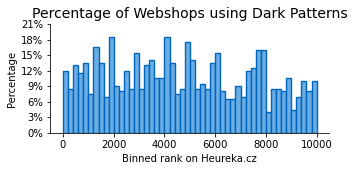

In [17]:
with plt.rc_context({
    "axes.spines.right": False,
    "axes.spines.top": False,
}): 
    plt.bar(range(0,bins_count), data['dp_eshop_percent'], width=1, align='edge', edgecolor='#0065BD', linewidth=1.4, color="#6AADE4")
    plt.xlabel('Binned rank on Heureka.cz') 
    plt.ylabel('Percentage') 
    plt.title('Percentage of Webshops using Dark Patterns', fontsize=14) 
    plt.xticks(range(0,bins_count+4,10),[0,2000,4000,6000,8000,10000])
    plt.yticks(range(0,24,3))
    plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(100, decimals=0))
    plt.gcf().set_size_inches(5,2)
    plt.savefig('../../../thesis/media/graphs/freq-histogram-dp.pgf')

<ipython-input-18-522e19558b7d>:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


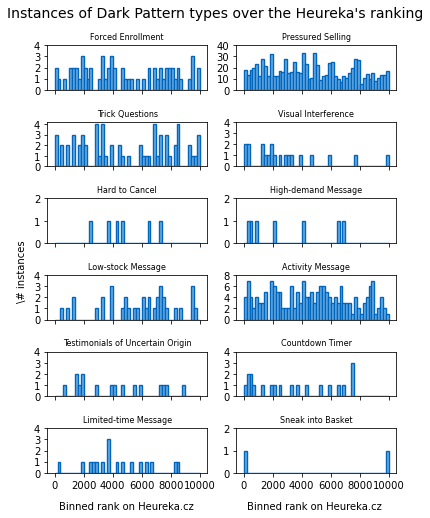

In [18]:
dp_types = ['Forced Enrollment', 'Pressured Selling',
            'Trick Questions', 'Visual Interference',
            'Hard to Cancel', 'High-demand Message',
            'Low-stock Message', 'Activity Message',
            'Testimonials of Uncertain Origin',
            'Countdown Timer', 'Limited-time Message',
            'Sneak into Basket']

fig, axs = plt.subplots(6,2,sharex=True)
fig.text(0.5, 0.97, 'Instances of Dark Pattern types over the Heureka\'s ranking', fontsize=14, ha='center') 

datas = []
ymajorticks = [(5, 1), (50, 10), (5, 1), (5, 1), (3, 1), (3, 1), (5, 1), (10,2), (5,1), (5,1), (5,1), (3,1)]
i=0
plt.tight_layout(rect=[0.02, 0.03, 1, 0.97],h_pad=0.7) 
for dp_type in dp_types:
    df_by_type = df[df['Pattern Type'] == dp_types[i]].drop_duplicates(subset='Domain')
    datas.append(df_by_type[['binned_rank', 'rank']].groupby('binned_rank').agg(dp_count=('binned_rank','count')))
    i+=1
    
i=0
for row in axs:
    for ax in row:
        with plt.rc_context({
            "axes.spines.right": False,
            "axes.spines.top": False,
        }): 
    #         fig.subxlabel('Binned rank on Heureka.cz') 
    #         fig.subylabel('Percentage') 
            ax.bar(range(0,bins_count), datas[i]['dp_count'], width=1, edgecolor="#0065BD", align='edge', linewidth=1.4, color="#6AADE4")
            plt.sca(ax)
            plt.xticks(range(0,bins_count+4,10),[0,2000,4000,6000,8000,10000])
            plt.yticks(range(0,ymajorticks[i][0],ymajorticks[i][1]))
            plt.title(dp_types[i], fontsize=8)
            plt.gcf().set_size_inches(12,6)
            i+=1
                    
plt.gcf().set_size_inches(5.5,7.5)
fig.text(0.275, 0.06, 'Binned rank on Heureka.cz', ha='center')
fig.text(0.75, 0.06, 'Binned rank on Heureka.cz', ha='center')
fig.text(0, 0.50, '\# instances', va='center', rotation='vertical')
fig.show()
plt.savefig('../../../thesis/media/graphs/dp-by-type.pgf')


In [19]:
temp = data['dp_eshop_percent'].to_frame().reset_index()
temp['index'] = range(0,50,1)

In [20]:
from scipy import stats
tau, p_value = stats.spearmanr(temp['index'], temp['dp_eshop_percent'])
print(tau, p_value)

-0.29129572075632404 0.040128974805467565


# E-commerce solutions used by webshops

In [21]:
df_ecommerce = pd.read_csv('../../../data/e-commerce-solutions.csv', delimiter=";")
df_ecommerce['Domain'] = df_ecommerce['domain'].str.replace('www.', '')
del df_ecommerce['domain']

In [22]:
pages = [
    'obchod.pohledysdarkem.cz',
    'shop.forstcz.cz',
    'shop.bontcycling.cz'
]
df_ecommerce['Domain'] = df_ecommerce['Domain'].apply(lambda x: x.replace('shop.', '').replace('obchod.', '') if x in pages else x)

In [23]:
df_ecommerce = pd.merge(df_ecommerce,df_ranks,on='Domain',how='left')

In [24]:
df_ecommerce[df_ecommerce['rank'].isnull()]

,inner_text,site_url,e-shop,Domain,Name,HeurekaURL,URL,rank


In [25]:
dataset_length = 10000
bin_size = 200;
bins_count = int(dataset_length/bin_size)
bins = np.linspace(0,dataset_length,bins_count+1)

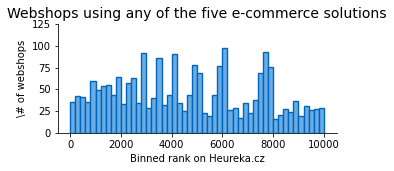

In [26]:
df_ecommerce['binned_rank'] = pd.cut(df_ecommerce['rank'], bins)
# sum of all
data = df_ecommerce[['binned_rank', 'rank']].groupby('binned_rank').agg(count=('binned_rank','count'))

with plt.rc_context({
    "axes.spines.right": False,
    "axes.spines.top": False,
}): 
    plt.bar(range(0,bins_count), data['count'], width=1, align='edge', edgecolor='#0065BD', linewidth=1.4, color="#6AADE4")
    plt.xlabel('Binned rank on Heureka.cz') 
    plt.ylabel('\# of webshops') 
    plt.title('Webshops using any of the five e-commerce solutions', fontsize=14) 
    plt.xticks(range(0,bins_count+4,10),[0,2000,4000,6000,8000,10000])
    plt.yticks(range(0,150,25))
    plt.gcf().set_size_inches(5,2)
    plt.savefig('../../../thesis/media/graphs/e-commercesolution-histogram.pgf')

<ipython-input-27-4f3e4541d664>:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


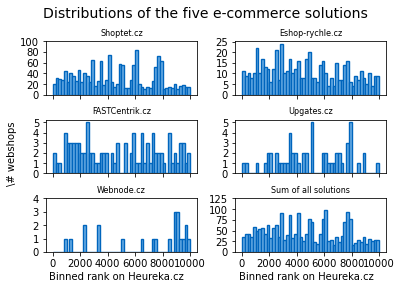

In [27]:
solutions = ['shoptet', 'eshop-rychle', 'fastcentrik', 'upgates', 'webnode']
names = ['Shoptet.cz', 'Eshop-rychle.cz', 'FASTCentrik.cz', 'Upgates.cz', 'Webnode.cz', 'Sum of all solutions']

fig, axs = plt.subplots(3,2,sharex=True)
fig.text(0.5, 0.97, 'Distributions of the five e-commerce solutions', fontsize=14, ha='center') 

datas = []
ymajorticks = [(120, 20), (30, 5), (6, 1), (6, 1), (5, 1), (150, 25)]
i=0
plt.tight_layout(rect=[0.02, 0.06, 1, 0.94],h_pad=1.5) 
for solution in solutions:
    df_by_solution = df_ecommerce[df_ecommerce['e-shop'] == solution]
    datas.append(df_by_solution[['binned_rank', 'rank']].groupby('binned_rank').agg(count=('binned_rank','count')))
    i+=1
    
i=0
for row in axs:
    for ax in row:
        with plt.rc_context({
            "axes.spines.right": False,
            "axes.spines.top": False,
        }):  
            if i == 5:
                ax.bar(range(0,bins_count), data['count'], width=1, align='edge', edgecolor='#0065BD', linewidth=1.4, color="#6AADE4")
            else:
                ax.bar(range(0,bins_count), datas[i]['count'], width=1, edgecolor="#0065BD", align='edge', linewidth=1.4, color="#6AADE4")
            plt.sca(ax)
            plt.xticks(range(0,bins_count+4,10),[0,2000,4000,6000,8000,10000])
            plt.yticks(range(0,ymajorticks[i][0],ymajorticks[i][1]))
            plt.title(names[i], fontsize=8)
            plt.gcf().set_size_inches(12,6)
            i+=1
                    
plt.gcf().set_size_inches(5.5,4)
fig.text(0.275, 0.06, 'Binned rank on Heureka.cz', ha='center')
fig.text(0.755, 0.06, 'Binned rank on Heureka.cz', ha='center')
fig.text(0, 0.50, '\# webshops', va='center', rotation='vertical')
fig.show()
plt.savefig('../../../thesis/media/graphs/ecommerce-solutions-histograms.pgf')
datas.append(df_by_solution[['binned_rank', 'rank']].groupby('binned_rank').agg(count=('binned_rank','count')))

In [28]:
dataset_length = 10000
bin_size = 250;
bins_count = int(dataset_length/bin_size)
bins = np.linspace(0,dataset_length,bins_count+1)

df_ecommerce['binned_rank'] = pd.cut(df_ecommerce['rank'], bins)

data = df_ecommerce[['binned_rank', 'rank']].groupby('binned_rank').agg(count=('binned_rank','count'))

datas = []
i=0
for solution in solutions:
    df_by_solution = df_ecommerce[df_ecommerce['e-shop'] == solution]
    datas.append(df_by_solution[['binned_rank', 'rank']].groupby('binned_rank').agg(count=('binned_rank','count')))
    i+=1

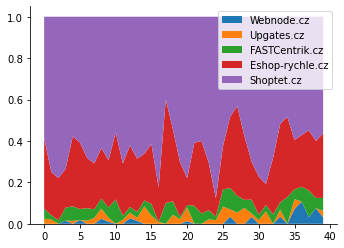

In [29]:
with plt.rc_context({
    "axes.spines.right": False,
    "axes.spines.top": False,
}): 
    plt.tight_layout()
    plt.stackplot(range(0,bins_count),
                  (datas[4]/data)['count'],
                  (datas[3]/data)['count'],
                  (datas[2]/data)['count'],
                  (datas[1]/data)['count'],
                  (datas[0]/data)['count'],
                  labels=['Webnode.cz', 'Upgates.cz', 'FASTCentrik.cz', 'Eshop-rychle.cz', 'Shoptet.cz'])
    plt.gcf().set_size_inches(5.5,4)
    plt.legend()
    plt.show()

## Which dark patterns are used by different e-commerce solutions.

Firstly, generate a file of used e-commerce solutions for websites via Jupyter notebook in e-commerce-solutions folder.

In [30]:
df_ecommerce = pd.read_csv('../../../data/e-commerce-solutions.csv', delimiter=";")
df_ecommerce['Domain'] = df_ecommerce['domain'].str.replace('www.', '')
del df_ecommerce['domain']

In [31]:
df_ecommerce = pd.merge(df_ecommerce,df,on='Domain',how='inner')
df_ecommerce.shape

(675, 16)

In [32]:
df_ecommerce['pattern_string_lower_case'] = df_ecommerce['Pattern String'].apply(lambda x: str(x).lower())
df_ecommerce['pattern_string_lower_case'] = df_ecommerce['pattern_string_lower_case'].replace("([0-9]+[ ,.-/:]*)+","NUMBER", regex=True)
df_ecommerce = df_ecommerce.sort_values(['e-shop','pattern_string_lower_case'], ascending=(True,True))

df_ecommerce_unique = df_ecommerce.drop_duplicates(
    subset=['pattern_string_lower_case',
            'e-shop',
            'Pattern Category',
            'Pattern Type',
            'Where in website'],
    keep='last')

df_ecommerce_unique[['Domain','e-shop', 'Pattern Type']].groupby(['Pattern Type','e-shop']).agg({'Domain': ['count', pd.Series.nunique]})

Domain        
                                   count nunique
Pattern Type         e-shop                     
Activity Message     eshop-rychle      5       5
                     fastcentrik       5       3
                     shoptet          24      20
                     upgates           2       2
Countdown Timer      shoptet           2       2
Forced Enrollment    eshop-rychle      7       4
                     fastcentrik       1       1
                     shoptet           1       1
                     upgates           1       1
Hard to Cancel       eshop-rychle      1       1
High-demand Message  shoptet           1       1
Limited-time Message shoptet           2       2
Low-stock Message    shoptet           1       1
Pressured Selling    eshop-rychle      3       3
                     fastcentrik      11       9
                     shoptet          13      11
                     upgates           1       1
Trick Questions      fastcentrik       1       1
                     shoptet           2       2
                     upgates           1       1
Visual Interference  eshop-rychle      2       1
                     upgates           1       1

## Notifikuj.cz analysis

In [33]:
df_notifikuj = pd.read_csv('../../../data/notifikuj-webshops.csv', delimiter=";")
df_notifikuj['Domain'] = df_notifikuj['domain'].str.replace('www.', '')
del df_notifikuj['domain']

In [34]:
df_notifikuj = pd.merge(df_notifikuj,df,on='Domain',how='left')

In [35]:
df_notifikuj.drop_duplicates(subset="Domain")

,inner_text,site_url,inner_text_lower_case,Domain,Pattern String,Comment,Pattern Category,Pattern Type,Where in website,Deceptive,Website Page,Name,HeurekaURL,URL,rank,binned_rank
0,před 2 dny od Notifikuj,https://www.trpajzlik.cz/Mouse-Mama-damske-tricko-d1228.htm,před NUMBERdny od notifikuj,trpajzlik.cz,1944 lidí navštívilo tento web za posledních 30 dní ✓ ověřeno od Notifikuj x,NaN,Social Proof,Activity Message,Product Detail,??,https://www.trpajzlik.cz/Detske-body-fandim-SK-Slavia-Praha-d680.htm,Trpajzlik.cz,https://www.heureka.cz/exit/trpajzlik-cz/?z=4,https://www.trpajzlik.cz/,7635,"(7600.0, 7800.0]"
2,před 1 hodinou od Notifikuj,https://www.sportfanatics.cz/fitness-potreby/shop.php?m=Extrifit%20Proteinut%20400g%20400g%20Sko%C5%99icov%C3%A1%20su%C5%A1enka,před NUMBERhodinou od notifikuj,sportfanatics.cz,Jana z Prahy má dokončenou objednávku před 1 hodinou od Notifikuj x,NaN,Social Proof,Activity Message,Product Detail,??,https://www.sportfanatics.cz/fitness-potreby/shop.php?m=Extrifit%20Nut%206%21%20300%20g%20300g%20Natural,SportFanatics.cz,https://www.heureka.cz/exit/sportfanatics-cz/?z=4,https://www.sportfanatics.cz/,1336,"(1200.0, 1400.0]"
3,Ivana z Prahy\nmá dokončenou objednávku\npřed 54 minutami od Notifikuj\nx,https://www.ifp-publishing.cz/dobrodruzne-pribehy/neuveritelna-namorni-dobrodruzstvi/,ivana z prahy\nmá dokončenou objednávku\npřed NUMBERminutami od notifikuj\nx,ifp-publishing.cz,Ivana z Prahy má dokončenou objednávku před 54 minutami od Notifikuj x,NaN,Social Proof,Activity Message,Product Detail,No,https://www.ifp-publishing.cz/dobrodruzne-pribehy/neuveritelna-namorni-dobrodruzstvi/,IFP Publishing,https://www.heureka.cz/exit/ifp-publishing-cz/?z=4,https://www.ifp-publishing.cz/,27887,NaN
4,36 návštěvníků\nsi právě prohlíží tento web\n✓ ověřeno od Notifikuj\nx,https://www.pasti.cz/ultrazvukovy-plasic-kun-a-hlodavcu-deramax-profi/,NUMBERnávštěvníků\nsi právě prohlíží tento web\n✓ ověřeno od notifikuj\nx,pasti.cz,36 návštěvníků si právě prohlíží tento web ✓ ověřeno od Notifikuj x,NaN,Social Proof,Activity Message,Product Detail,No,https://www.pasti.cz/ultrazvukovy-plasic-kun-a-hlodavcu-deramax-profi/,pasti.cz,https://www.heureka.cz/exit/pasti-cz/?z=4,https://www.pasti.cz/,1537,"(1400.0, 1600.0]"
5,Eva z Prahy\nPoslední objednávka\npřed 54 minutami od Notifikuj\nx,https://www.fyto-kosmetika.cz/bio-ustni-sprej-pro-svezi-dech-s-termomineralni-vodou-15-ml-p12021,eva z prahy\nposlední objednávka\npřed NUMBERminutami od notifikuj\nx,fyto-kosmetika.cz,Eva z Prahy Poslední objednávka před 13 hodinami od Notifikuj x,NaN,Social Proof,Activity Message,Product Detail,??,https://www.fyto-kosmetika.cz/meinebase-zasadito-mineralni-koupelova-sul-2750-g-p7770,Fyto-kosmetika.cz,https://www.heureka.cz/exit/fyto-kosmetika-cz/?z=4,https://www.fyto-kosmetika.cz/,5985,"(5800.0, 6000.0]"
6,před 3 minutami od Notifikuj,https://www.electro.cz/volne-stojici-pracky-predem/philco/pl-1062-chiva,před NUMBERminutami od notifikuj,electro.cz,Jan z Prahy Objednal(a) na Electro.cz ? před 1 hodinou od Notifikuj x,NaN,Social Proof,Activity Message,Product Detail,??,https://www.electro.cz/volne-stojici-mycky/mora/sm-585-w,ELECTRO,https://www.heureka.cz/exit/electro-cz/?z=4,https://www.electro.cz/,1508,"(1400.0, 1600.0]"
7,Eva z Ostravy\nmá dokončenou objednávku\npřed 9 hodinami od Notifikuj\nx,https://www.memoa.cz/pece-o-vlasy/keratinova-maska-na-vlasy-s-kofeinem-vivapharm-200-ml/,eva z ostravy\nmá dokončenou objednávku\npřed NUMBERhodinami od notifikuj\nx,memoa.cz,482 lidí navštívilo tento web za posledních 7 dní,NaN,Social Proof,Activity Message,Product Detail,??,https://www.memoa.cz/pece-o-vlasy/keratinova-maska-na-vlasy-s-kofeinem-vivapharm-200-ml/,Memoa.cz,https://www.heureka.cz/exit/memoa-cz/?z=4,https://www.memoa.cz/,2391,"(2200.0, 2400.0]"
12,Ludmila z Českých Budějovic\nmá objednáno vše na pečení ?\npřed 5 minutami od Notifikuj\nx,https://www.hospodynkam.cz/smes-na-duhovy-dort-rainbow-600g/,ludmila z českých budějovic\nmá objednáno vše 

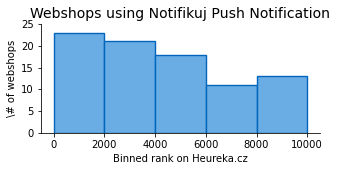

In [36]:
dataset_length = 10000
bin_size = 2000;
bins_count = int(dataset_length/bin_size)
bins = np.linspace(0,dataset_length,bins_count+1)

df_notifikuj['binned_rank'] = pd.cut(df_notifikuj['rank'], bins)

# sum of all
data = df_notifikuj[['binned_rank', 'rank']].groupby('binned_rank').agg(count=('binned_rank','count'))

with plt.rc_context({
    "axes.spines.right": False,
    "axes.spines.top": False,
}): 
    plt.bar(range(0,bins_count), data['count'], width=1, align='edge', edgecolor='#0065BD', linewidth=1.4, color="#6AADE4")
    plt.xlabel('Binned rank on Heureka.cz') 
    plt.ylabel('\# of webshops') 
    plt.title('Webshops using Notifikuj Push Notification', fontsize=14) 
    plt.xticks(range(0,bins_count+1,1),[0,2000,4000,6000,8000,10000])
    plt.yticks(range(0,30,5))
    plt.gcf().set_size_inches(5,2)
    plt.savefig('../../../thesis/media/graphs/notifikuj-histogram.pgf')

# Frequently used dark pattern on Czech Webshops

In [37]:
df['pattern_string_lower_case'] = df['Pattern String'].apply(lambda x: str(x).lower())
df['pattern_string_lower_case'] = df['pattern_string_lower_case'].replace("([0-9]+[ ,.-/:]*)+","NUMBER", regex=True)

### Free Shipping

In [38]:
free_shipping = df[
    (df['pattern_string_lower_case'].str.contains('poštovn|doprav|doruče',regex=True))
    & (df['Pattern Type'] == 'Pressured Selling')
]
free_shipping

,Pattern String,Comment,Pattern Category,Pattern Type,Where in website,Deceptive,Website Page,Domain,Name,HeurekaURL,URL,rank,binned_rank,pattern_string_lower_case
150,"AKCE: Vložte do košíku ještě 2 ks zboží, nebo zboží za min. 311 Kč, který máme skladem a DOPRAVA k Vám bude ZDARMA!",NaN,Misdirection,Pressured Selling,Cart Detail,No,https://www.supergamer.cz/webova-kamera-sandberg-flex-1080p-fullhd-p-413586.html,supergamer.cz,1game,https://www.heureka.cz/exit/1game-cz/?z=4,https://www.supergamer.cz/,4273,"(4200.0, 4400.0]","akce: vložte do košíku ještě NUMBERks zboží, nebo zboží za min. NUMBERkč, který máme skladem a doprava k vám bude zdarma!"
155,Abyste nehradili poštovné zbývá nakoupit za 2 780 Kč.,NaN,Misdirection,Pressured Selling,Cart Detail,No,http://www.gesprofi.cz/p1814-stativ-stojan-heavy-duty-s-jemnym-nastavenim/,gesprofi.cz,GES Profi CZ s.r.o.,https://www.heureka.cz/exit/gesprofi-cz/?z=4,http://www.gesprofi.cz/,8238,"(8200.0, 8400.0]",abyste nehradili poštovné zbývá nakoupit za NUMBERkč.
156,Abyste nehradili poštovné zbývá nakoupit za 3 002 Kč.,NaN,Misdirection,Pressured Selling,Cart Detail,No,http://www.motocomponents.cz/kosik/,motocomponents.cz,Moto Components,https://www.heureka.cz/exit/motocomponents-cz/?z=4,http://www.motocomponents.cz/,5490,"(5400.0, 5600.0]",abyste nehradili poštovné zbývá nakoupit za NUMBERkč.
157,Abyste nehradili poštovné zbývá nakoupit za 98 901 Kč.,NaN,Misdirection,Pressured Selling,Cart Detail,No,http://www.unipraelektro.cz/kosik.html?item=79265,unipraelektro.cz,UNIPRA ELEKTRO,https://www.heureka.cz/exit/unipra-cz/?z=4,http://www.unipraelektro.cz/,3720,"(3600.0, 3800.0]",abyste nehradili poštovné zbývá nakoupit za NUMBERkč.
158,"Abyste neplatili za poštovné, je třeba objednat ještě za 711,00 Kč.",NaN,Misdirection,Pressured Selling,Cart Detail,No,https://www.profi-pedikura.cz/kosik/,profi-pedikura.cz,DOMACI-PEDIKURA.cz,https://www.heureka.cz/exit/domaci-pedikura-cz/?z=4,https://www.profi-pedikura.cz/,1823,"(1800.0, 2000.0]","abyste neplatili za poštovné, je třeba objednat ještě za NUMBERkč."
159,"Abyste neplatili za poštovné, je třeba objednat ještě za 8 850 Kč",NaN,Misdirection,Pressured Selling,Cart Detail,No,https://www.kvalitnepodlahy.cz/kosik/,kvalitnepodlahy.cz,kvalitnepodlahy.cz,https://www.heureka.cz/exit/kvalitnepodlahy-cz/?z=4,https://www.kvalitnepodlahy.cz/,1331,"(1200.0, 1400.0]","abyste neplatili za poštovné, je třeba objednat ještě za NUMBERkč"
169,"CHCETE DOPRAVU ZDARMA? NAKUPTE JEŠTĚ ZA 4 711,00 KČ A ZÍSKEJTE JI OD NÁS JAKO DÁREK",NaN,Misdirection,Pressured Selling,Product Detail,No,https://shop.fkt.cz/led-trubice-t8-pro2-np-120cm-6000k-2-880lm-18w-230v-matna-np-ean4739448-skupcq0201000003.php,shop.fkt.cz,ElektroEden.cz,https://www.heureka.cz/exit/elektroeden-cz/?z=4,https://shop.fkt.cz/,4333,"(4200.0, 4400.0]",chcete dopravu zdarma? nakupte ještě za NUMBERkč a získejte ji od nás jako dárek
178,Chcete dopravu zdarma hned? Vyberte si ze zlevněného zboží,NaN,Misdirection,Pressured Selling,Product Detail,No,https://www.samostatne-dite.cz/nabytek/set-stolecek-a-zidlicka-kostka-3v1-prirodni/,samostatne-dite.cz,www.samostatne-dite.cz,https://www.heureka.cz/exit/samostatne-dite-cz/?z=4,https://www.samostatne-dite.cz/,3316,"(3200.0, 3400.0]",chcete dopravu zdarma hned? vyberte si ze zlevněného zboží
191,Do dopravy zdarma + 7 proteinových jídel zdarma zbývá nakoupit už jen za 2 559 Kč !,NaN,Misdirection,Pressured Selling,Product Detail,No,https://www.victus.cz/slane-proteinove-jidlo_k2/proteinove-omelety_k5/,victus.cz,VICTUS MEDICAL,https://www.heureka.cz/exit/victus-cz/?z=4,https://www.victus.cz/,9976,"(9800.0, 10000.0]",do dopravy zdarma + NUMBERproteinových jídel zdarma zbývá nakoupit už jen za NUMBERkč !
192,Do dopravy zdarma stačí nakoupit ještě za: 11 335 Kč,NaN,Misdirection,Pressured Selling,Product Detail,No,https://www.abecedaobkladu.cz/obklady-opoczno/opoczno-artistic-way/artistic-way-white-structure-25x75-5935.html,abecedaobkladu.cz,obkladyeshop,https://www.heureka.cz/

In [39]:
free_shipping.shape

(132, 14)

In [40]:
df[(df['pattern_string_lower_case'].str.contains('zdarma'))
   &(df['pattern_string_lower_case'].str.contains('poštovn|doprav|doruče'))]

,Pattern String,Comment,Pattern Category,Pattern Type,Where in website,Deceptive,Website Page,Domain,Name,HeurekaURL,URL,rank,binned_rank,pattern_string_lower_case
150,"AKCE: Vložte do košíku ještě 2 ks zboží, nebo zboží za min. 311 Kč, který máme skladem a DOPRAVA k Vám bude ZDARMA!",NaN,Misdirection,Pressured Selling,Cart Detail,No,https://www.supergamer.cz/webova-kamera-sandberg-flex-1080p-fullhd-p-413586.html,supergamer.cz,1game,https://www.heureka.cz/exit/1game-cz/?z=4,https://www.supergamer.cz/,4273,"(4200.0, 4400.0]","akce: vložte do košíku ještě NUMBERks zboží, nebo zboží za min. NUMBERkč, který máme skladem a doprava k vám bude zdarma!"
169,"CHCETE DOPRAVU ZDARMA? NAKUPTE JEŠTĚ ZA 4 711,00 KČ A ZÍSKEJTE JI OD NÁS JAKO DÁREK",NaN,Misdirection,Pressured Selling,Product Detail,No,https://shop.fkt.cz/led-trubice-t8-pro2-np-120cm-6000k-2-880lm-18w-230v-matna-np-ean4739448-skupcq0201000003.php,shop.fkt.cz,ElektroEden.cz,https://www.heureka.cz/exit/elektroeden-cz/?z=4,https://shop.fkt.cz/,4333,"(4200.0, 4400.0]",chcete dopravu zdarma? nakupte ještě za NUMBERkč a získejte ji od nás jako dárek
178,Chcete dopravu zdarma hned? Vyberte si ze zlevněného zboží,NaN,Misdirection,Pressured Selling,Product Detail,No,https://www.samostatne-dite.cz/nabytek/set-stolecek-a-zidlicka-kostka-3v1-prirodni/,samostatne-dite.cz,www.samostatne-dite.cz,https://www.heureka.cz/exit/samostatne-dite-cz/?z=4,https://www.samostatne-dite.cz/,3316,"(3200.0, 3400.0]",chcete dopravu zdarma hned? vyberte si ze zlevněného zboží
191,Do dopravy zdarma + 7 proteinových jídel zdarma zbývá nakoupit už jen za 2 559 Kč !,NaN,Misdirection,Pressured Selling,Product Detail,No,https://www.victus.cz/slane-proteinove-jidlo_k2/proteinove-omelety_k5/,victus.cz,VICTUS MEDICAL,https://www.heureka.cz/exit/victus-cz/?z=4,https://www.victus.cz/,9976,"(9800.0, 10000.0]",do dopravy zdarma + NUMBERproteinových jídel zdarma zbývá nakoupit už jen za NUMBERkč !
192,Do dopravy zdarma stačí nakoupit ještě za: 11 335 Kč,NaN,Misdirection,Pressured Selling,Product Detail,No,https://www.abecedaobkladu.cz/obklady-opoczno/opoczno-artistic-way/artistic-way-white-structure-25x75-5935.html,abecedaobkladu.cz,obkladyeshop,https://www.heureka.cz/exit/obkladyeshop-cz/?z=4,https://www.abecedaobkladu.cz/,1818,"(1800.0, 2000.0]",do dopravy zdarma stačí nakoupit ještě za: NUMBERkč
193,Do dopravy zdarma stačí nakoupit ještě za: 2 354 Kč,NaN,Misdirection,Pressured Selling,Product Detail,No,https://www.abanesa.cz/zbozi/mirabela-cerstva-kava-costa-rica-tarrazu-100-arabika-225g-764.html,abanesa.cz,Abanesa.cz,https://www.heureka.cz/exit/abanesa-cz/?z=4,https://www.abanesa.cz/,8210,"(8200.0, 8400.0]",do dopravy zdarma stačí nakoupit ještě za: NUMBERkč
194,Do dopravy zdarma vám zbývá nakoupit za 2722 Kč!,NaN,Misdirection,Pressured Selling,Product Detail,No,https://www.alkohouse.cz/vinarstvi-babicek-vacenovsky/babicek-vacenovsky-frankovka-klaret-2015,alkohouse.cz,Alkohouse.cz,https://www.heureka.cz/exit/alkohouse-cz/?z=4,https://www.alkohouse.cz/,7712,"(7600.0, 7800.0]",do dopravy zdarma vám zbývá nakoupit za NUMBERkč!
195,Do dopravy zdarma zbývá 1 318 Kč! Návrat do eshopu →,NaN,Misdirection,Pressured Selling,Product Detail,No,https://pravaja.cz/kosik/,pravaja.cz,PraváJá,https://www.heureka.cz/exit/pravaja-cz/?z=4,https://pravaja.cz/,7215,"(7200.0, 7400.0]",do dopravy zdarma zbývá NUMBERkč! návrat do eshopu →
196,Do dopravy zdarma zbývá 636 Kč!,NaN,Misdirection,Pressured Selling,Product Detail,No,https://pravaja.cz/produkt/osvezujici-odlicovaci-olej-pravaja-100-ml/,pravaja.cz,PraváJá,https://www.heureka.cz/exit/pravaja-cz/?z=4,https://pravaja.cz/,7215,"(7200.0, 7400.0]",do dopravy zdarma zbývá NUMBERkč!
197,Do dopravy zdarma zbývá nakoupit už jen za 949 Kč!,NaN,Misdirection,Pressured Selling,Product Detail,No,https://www.victus.cz/slane-proteinove-jidlo_k2/proteinove-omelety_k5/,victus.cz,VICTUS MEDICAL,https://www.heureka.cz/exit/victus-cz/?z=4,https://www.victus.cz/,9976,"(9800.0, 10000.0]",do dopravy zdarma zb

In [41]:
df[
    (~df['pattern_string_lower_case'].str.contains('poštovn|doprav|doruče',regex=True))
    & (df['Pattern Type'] == 'Pressured Selling')
]

,Pattern String,Comment,Pattern Category,Pattern Type,Where in website,Deceptive,Website Page,Domain,Name,HeurekaURL,URL,rank,binned_rank,pattern_string_lower_case
4,NaN,Preselected the most expensive variation,Misdirection,Pressured Selling,Product Detail,No,https://www.fotokeramika.cz/ozdoby-na-hroby/sochy-jezise-krista/383-1004-kristus-na-krizi,fotokeramika.cz,Kaluma s.r.o.,https://www.heureka.cz/exit/fotokeramika-cz/?z=4,https://www.fotokeramika.cz/,6544,"(6400.0, 6600.0]",nan
6,NaN,In a popup,Misdirection,Pressured Selling,Product Detail,No,https://www.kutiliste.cz/sklenik-gutta-gardentec-classic-rozmery-2-x-3-m-zaskleni-polykarbonat-4-mm#detail-3,kutiliste.cz,Kutiliště,https://www.heureka.cz/exit/kutiliste-cz/?z=4,https://www.kutiliste.cz/,2947,"(2800.0, 3000.0]",nan
12,... nakupte ještě za 1458Kč a máte výdejnu zdarma.,NaN,Misdirection,Pressured Selling,Cart Detail,No,https://www.zabezpecovaci-zarizeni.cz/inshop/scripts/shop.aspx?action=showshoppingcart,zabezpecovaci-zarizeni.cz,Zabezpečovací zařízení,https://www.heureka.cz/exit/zabezpecovaci-zarizeni-cz/?z=4,https://www.zabezpecovaci-zarizeni.cz/,5610,"(5600.0, 5800.0]",... nakupte ještě za NUMBERkč a máte výdejnu zdarma.
187,DOPLŇKOVÝ PRODEJ:,In a cart as additional possible boughts,Misdirection,Pressured Selling,Cart Detail,No,https://www.rescue-store.cz/kosik/,rescue-store.cz,SHOParamedik,https://www.heureka.cz/exit/rescue-store-cz/?z=4,https://www.rescue-store.cz/,6847,"(6800.0, 7000.0]",doplňkový prodej:
188,Dejte tomuto zboží druhou šanci od 5 679 Kč,Giving a discount to user if he watched the product before and might reconsider to buy the product with the discount,Misdirection,Pressured Selling,Product Detail,No,https://www.czc.cz/xiaomi-redmi-note-9-pro-6gb-128gb-tropical-green/286834/produkt,czc.cz,CZC.cz,https://www.heureka.cz/exit/czc-cz/?z=4,https://www.czc.cz/,5,"(0.0, 200.0]",dejte tomuto zboží druhou šanci od NUMBERkč
200,Dodatečná sleva 4 % na celý nákup je vaše! Ušetřili jste 131 Kč. Nakupte ještě za 1 864 Kč a získáte vyšší slevu.,NaN,Misdirection,Pressured Selling,Cart Detail,No,https://www.mivardi.cz/eshop/cart/step1,mivardi.cz,mivardi.cz,https://www.heureka.cz/exit/mivardi-cz/?z=4,https://www.mivardi.cz/,5991,"(5800.0, 6000.0]",dodatečná sleva NUMBER% na celý nákup je vaše! ušetřili jste NUMBERkč. nakupte ještě za NUMBERkč a získáte vyšší slevu.
202,Doporučené akce:,NaN,Misdirection,Pressured Selling,Cart Detail,No,https://darcik.cz/index.php?route=checkout/cart,darcik.cz,Darcik.cz,https://www.heureka.cz/exit/darcik-cz/?z=4,https://darcik.cz/,3753,"(3600.0, 3800.0]",doporučené akce:
203,Doporučené služby,In a popup,Misdirection,Pressured Selling,Product Detail,No,https://www.expert.cz/electrolux-lfb3af82r/,expert.cz,Expert.cz,https://www.heureka.cz/exit/expert-cz/?z=4,https://www.expert.cz/,364,"(200.0, 400.0]",doporučené služby
204,Doporučujeme ještě přikoupit,NaN,Misdirection,Pressured Selling,Product Detail,No,https://www.mujlekarnik.cz/reparil-dragees-20mg-tbl-ent-100-30230661_detail/,mujlekarnik.cz,MujLekarnik.cz,https://www.heureka.cz/exit/mujlekarnik-cz/?z=4,https://www.mujlekarnik.cz/,4515,"(4400.0, 4600.0]",doporučujeme ještě přikoupit
205,Doporučujeme přikoupit:,Popup,Misdirection,Pressured Selling,Product Detail,No,https://www.helkon.cz/detail/spotrebni-material-soucastky/alkalicke-baterie/bc-lr03-mikrotuzkova-alkalicka-baterie-aaa.html,helkon.cz,Helkon,https://www.heureka.cz/exit/helkon-cz/?z=4,https://www.helkon.cz/,7614,"(7600.0, 7800.0]",doporučujeme přikoupit:


## Facebook Likes in Products as a testimonial

In [42]:
df[(df['pattern_string_lower_case'].str.contains('líb'))].shape

(102, 14)

## Cross-selling / Others bought or we recommend to buy

In [43]:
cross_selling = df[
    (df['pattern_string_lower_case'].str.contains('koupi|kupu'))
    & (~df['pattern_string_lower_case'].str.contains('slev|zdarma|poštovn|doprav|doruče|zbývá'))
    & (df['Pattern Type'] == 'Pressured Selling')
]
cross_selling

,Pattern String,Comment,Pattern Category,Pattern Type,Where in website,Deceptive,Website Page,Domain,Name,HeurekaURL,URL,rank,binned_rank,pattern_string_lower_case
204,Doporučujeme ještě přikoupit,NaN,Misdirection,Pressured Selling,Product Detail,No,https://www.mujlekarnik.cz/reparil-dragees-20mg-tbl-ent-100-30230661_detail/,mujlekarnik.cz,MujLekarnik.cz,https://www.heureka.cz/exit/mujlekarnik-cz/?z=4,https://www.mujlekarnik.cz/,4515,"(4400.0, 4600.0]",doporučujeme ještě přikoupit
205,Doporučujeme přikoupit:,Popup,Misdirection,Pressured Selling,Product Detail,No,https://www.helkon.cz/detail/spotrebni-material-soucastky/alkalicke-baterie/bc-lr03-mikrotuzkova-alkalicka-baterie-aaa.html,helkon.cz,Helkon,https://www.heureka.cz/exit/helkon-cz/?z=4,https://www.helkon.cz/,7614,"(7600.0, 7800.0]",doporučujeme přikoupit:
253,K tomuto produktu zákazníci kupují,In a popup,Misdirection,Pressured Selling,Product Detail,No,https://www.knihydobrovsky.cz/kniha/10-000-kilometru-pesky-jizni-amerikou-293483404,knihydobrovsky.cz,Knihy Dobrovský,https://www.heureka.cz/exit/knihydobrovsky-cz/?z=4,https://www.knihydobrovsky.cz/,14,"(0.0, 200.0]",k tomuto produktu zákazníci kupují
489,OSTATNÍ KOUPILI TAKÉ,NaN,Misdirection,Pressured Selling,Product Detail,No,https://www.matemundo.cz/product-cze-8699-Yerba-Mate-SMES-Nejlepsi-druhy-Rodak-10x-100g.html,matemundo.cz,YerbaMarket,https://www.heureka.cz/exit/yerbamarket-cz/?z=4,https://matemundo.cz/,7366,"(7200.0, 7400.0]",ostatní koupili také
490,OSTATNÍ ZÁKAZNÍCI KOUPILI TAKÉ:,NaN,Misdirection,Pressured Selling,Cart Detail,No,https://www.muziker.cz/poc-joint-vpd-2-0-knee-uranium-black-xl,muziker.cz,MUZIKER.cz,https://www.heureka.cz/exit/muziker-cz/?z=4,https://www.muziker.cz/,378,"(200.0, 400.0]",ostatní zákazníci koupili také:
491,OSTATNÍ ZÁKAZNÍCI TAKÉ NAKOUPILI,In a popup,Misdirection,Pressured Selling,Product Detail,??,https://beta.shoptet.cz/panske-obleceni/columbia-bug-shield/,beta.shoptet.cz,beta.shoptet.cz,https://www.heureka.cz/exit/beta-shoptet-cz/?z=4,https://beta.shoptet.cz/,7119,"(7000.0, 7200.0]",ostatní zákazníci také nakoupili
492,OSTATNÍ ZÁKAZNÍCI TAKÉ NAKOUPILI,In a popup,Misdirection,Pressured Selling,Product Detail,??,https://eshop.happy-hair.cz/natulique/natulique-perfume-free-hair-scalp-hairwash/,eshop.happy-hair.cz,Happy Hair eshop,https://www.heureka.cz/exit/eshop-happy-hair-cz/?z=4,https://eshop.happy-hair.cz/,926,"(800.0, 1000.0]",ostatní zákazníci také nakoupili
493,OSTATNÍ ZÁKAZNÍCI TAKÉ NAKOUPILI,In a popup,Misdirection,Pressured Selling,Product Detail,??,https://eshop.nobl.cz/stoly-rohove/stul-ergo-vlna-pravy-160--120-80-cm-hobis-cross-ce-2005-p/,eshop.nobl.cz,NO+BL kancelářský nábytek,https://www.heureka.cz/exit/eshop-nobl-cz/?z=4,https://eshop.nobl.cz/,4180,"(4000.0, 4200.0]",ostatní zákazníci také nakoupili
494,OSTATNÍ ZÁKAZNÍCI TAKÉ NAKOUPILI,In a popup,Misdirection,Pressured Selling,Product Detail,??,https://obchod.dogfitness.cz/menforsan/menforsan-antiparazitni-sprej-pro-psy-proti-klistatum-a-blecham-s-extraktem-z-margosy/,obchod.dogfitness.cz,Dogfitness.cz,https://www.heureka.cz/exit/obchod-dogfitness-cz/?z=4,https://obchod.dogfitness.cz/,50,"(0.0, 200.0]",ostatní zákazníci také nakoupili
495,OSTATNÍ ZÁKAZNÍCI TAKÉ NAKOUPILI,In a popup,Misdirection,Pressured Selling,Product Detail,??,https://shop.hasnedl.cz/razitko-na-peceni--3cm-s-vasim-logem-nebo-textem/,shop.hasnedl.cz,Hasnedl.cz,https://www.heureka.cz/exit/shop-hasnedl-cz/?z=4,https://shop.hasnedl.cz/,5744,"(5600.0, 5800.0]",ostatní zákazníci také nakoupili


In [44]:
cross_selling.shape

(695, 14)

## Trick Questions - Heureka.cz "approved by customers email"

In [45]:
heureka = df[
    (df['Pattern Type'] == 'Trick Questions')
    & (df['pattern_string_lower_case']!= "nepřeji si dostávat na můj e-mail akční nabídky a novinky" )
]
heureka

,Pattern String,Comment,Pattern Category,Pattern Type,Where in website,Deceptive,Website Page,Domain,Name,HeurekaURL,URL,rank,binned_rank,pattern_string_lower_case
412,"Nemám zájem o možnost hodnocení tohoto nákupu na webu třetích stran (heureka.cz, zbozi.cz atp.)",NaN,Misdirection,Trick Questions,Checkout Process,No,https://www.sperky-image.cz/checkout,sperky-image.cz,Sperky-image.cz,https://www.heureka.cz/exit/sperky-image-cz/?z=4,https://www.sperky-image.cz/,7612,"(7600.0, 7800.0]","nemám zájem o možnost hodnocení tohoto nákupu na webu třetích stran (heureka.cz, zbozi.cz atp.)"
417,Nesouhlasím s předáním údajů za účelem nezávislého hodnocení nákupů,NaN,Misdirection,Trick Questions,Checkout Process,No,https://www.bedario.cz/Kosik?sekce=udaje,bedario.cz,Bedario.cz,https://www.heureka.cz/exit/bedario-cz/?z=4,https://www.bedario.cz/,6848,"(6800.0, 7000.0]",nesouhlasím s předáním údajů za účelem nezávislého hodnocení nákupů
418,"Nesouhlasím se zasláním dotazníku hodnocení obchodů Zboží.cz, který pomáhá zlepšovat vaše služby.",NaN,Misdirection,Trick Questions,Checkout Process,No,https://www.epostape.cz/kosik?krok=4&_fid=h92k,epostape.cz,Epostape,https://www.heureka.cz/exit/epostape-cz/?z=4,https://www.epostape.cz/,3953,"(3800.0, 4000.0]","nesouhlasím se zasláním dotazníku hodnocení obchodů zboží.cz, který pomáhá zlepšovat vaše služby."
419,Nesouhlasím se zasláním dotazníku pro hodnocení nákupu přes službu Zbozi.cz. Více informací,double negative,Misdirection,Trick Questions,Checkout Process,No,https://eshop.alfafit.cz/cz-sekce-objednavka.html?krokx=4#in_body,eshop.alfafit.cz,AlfaFIT,https://www.heureka.cz/exit/eshop-alfafit-cz/?z=4,https://eshop.alfafit.cz/,29,"(0.0, 200.0]",nesouhlasím se zasláním dotazníku pro hodnocení nákupu přes službu zbozi.cz. více informací
420,Nesouhlasím se zasláním dotazníku spokojenosti,NaN,Misdirection,Trick Questions,Checkout Process,No,https://www.nejlevnejsisport.cz/checkout_shipping.php,nejlevnejsisport.cz,NEJLEVNEJSISPORT.cz,https://www.heureka.cz/exit/nejlevnejsisport-cz/?z=4,https://www.nejlevnejsisport.cz/,490,"(400.0, 600.0]",nesouhlasím se zasláním dotazníku spokojenosti
421,Nesouhlasím se zasláním dotazníku spokojenosti s vyřízením objednávky,NaN,Misdirection,Trick Questions,Checkout Process,No,https://www.probazen.com/objednavka/,probazen.com,www.probazen.com,https://www.heureka.cz/exit/probazen-com/?z=4,https://www.probazen.com/,9587,"(9400.0, 9600.0]",nesouhlasím se zasláním dotazníku spokojenosti s vyřízením objednávky
422,"Nesouhlasím se zasláním dotazníku spokojenosti třetích stran (Heureka, Zboží...).",NaN,Misdirection,Trick Questions,Checkout Process,No,https://www.dekolamp.cz/kosik/detail.htm,dekolamp.cz,Dekolamp.cz,https://www.heureka.cz/exit/dekolamp-cz/?z=4,https://www.dekolamp.cz/,8600,"(8400.0, 8600.0]","nesouhlasím se zasláním dotazníku spokojenosti třetích stran (heureka, zboží...)."
423,"Nesouhlasím se zasláním dotazníku spokojenosti třetích stran (Heureka, Zboží...).",NaN,Misdirection,Trick Questions,Cart Detail,No,https://www.elotechnik.cz/kosik/detail.htm,elotechnik.cz,elotechnik.cz,https://www.heureka.cz/exit/elotechnik-cz/?z=4,https://www.elotechnik.cz/,9342,"(9200.0, 9400.0]","nesouhlasím se zasláním dotazníku spokojenosti třetích stran (heureka, zboží...)."
424,"Nesouhlasím se zasláním dotazníku spokojenosti třetích stran (Heureka, Zboží...).",NaN,Misdirection,Trick Questions,Checkout Process,No,https://www.krbykrbovevlozky.com/kosik/detail.htm,krbykrbovevlozky.com,"Krbové vložky, krby",https://www.heureka.cz/exit/krbykrbovevlozky-com/?z=4,https://www.krbykrbovevlozky.com/,3208,"(3200.0, 3400.0]","nesouhlasím se zasláním dotazníku spokojenosti třetích stran (heureka, zboží...)."
425,"Nesouhlasím se zasláním dotazníku spokojenosti třetích stran (Heureka, Zboží...).",NaN,Misdirection,Trick Questions,Product Detail,No,https://www.sgsport.cz/kosik/detail.htm,sgsport.cz,SGSPORT.CZ,https://www.heureka.cz/exit/sgsport-cz/?z=4,https://www.sgsport.cz/,7320,"(7200.0, 7400.0]"

In [46]:
heureka.shape

(67, 14)